In [1]:
#Importing dependencies
import numpy as np
import warnings as warnings
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , classification_report
warnings.filterwarnings('ignore')

In [2]:
#Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Loading in the csv as df_bs, where bs stands for brain stroke ;)
df_bs =pd.read_csv(r"brain_stroke.csv")

In [7]:
#Checking for how many patients are in the dataframe and how many 
df_bs.shape 

(4981, 11)

In [9]:
#Printing out the first 5 rows
df_bs.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
#Checking the data type for all 11 columns
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [13]:
#Checking for duplicated values.
df_bs.duplicated().sum()

0

In [15]:
#Checking for null values
df_bs.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
#Checking how many patients had a stroke versus not.
df_bs['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [19]:
#Data visualizations
#Setting a variable numerical_data that contains all the numerical data
numerical_data=df_bs[['age','avg_glucose_level','bmi']]
numerical_data

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4976,41.0,70.15,29.8
4977,40.0,191.15,31.1
4978,45.0,95.02,31.8
4979,40.0,83.94,30.0


In [21]:
#Setting a variable categorical_data that contains all the categorical data
categorical_data=df_bs.select_dtypes(include=['object','int64'])
categorical_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,smokes,0
4979,Male,0,0,Yes,Private,Rural,smokes,0


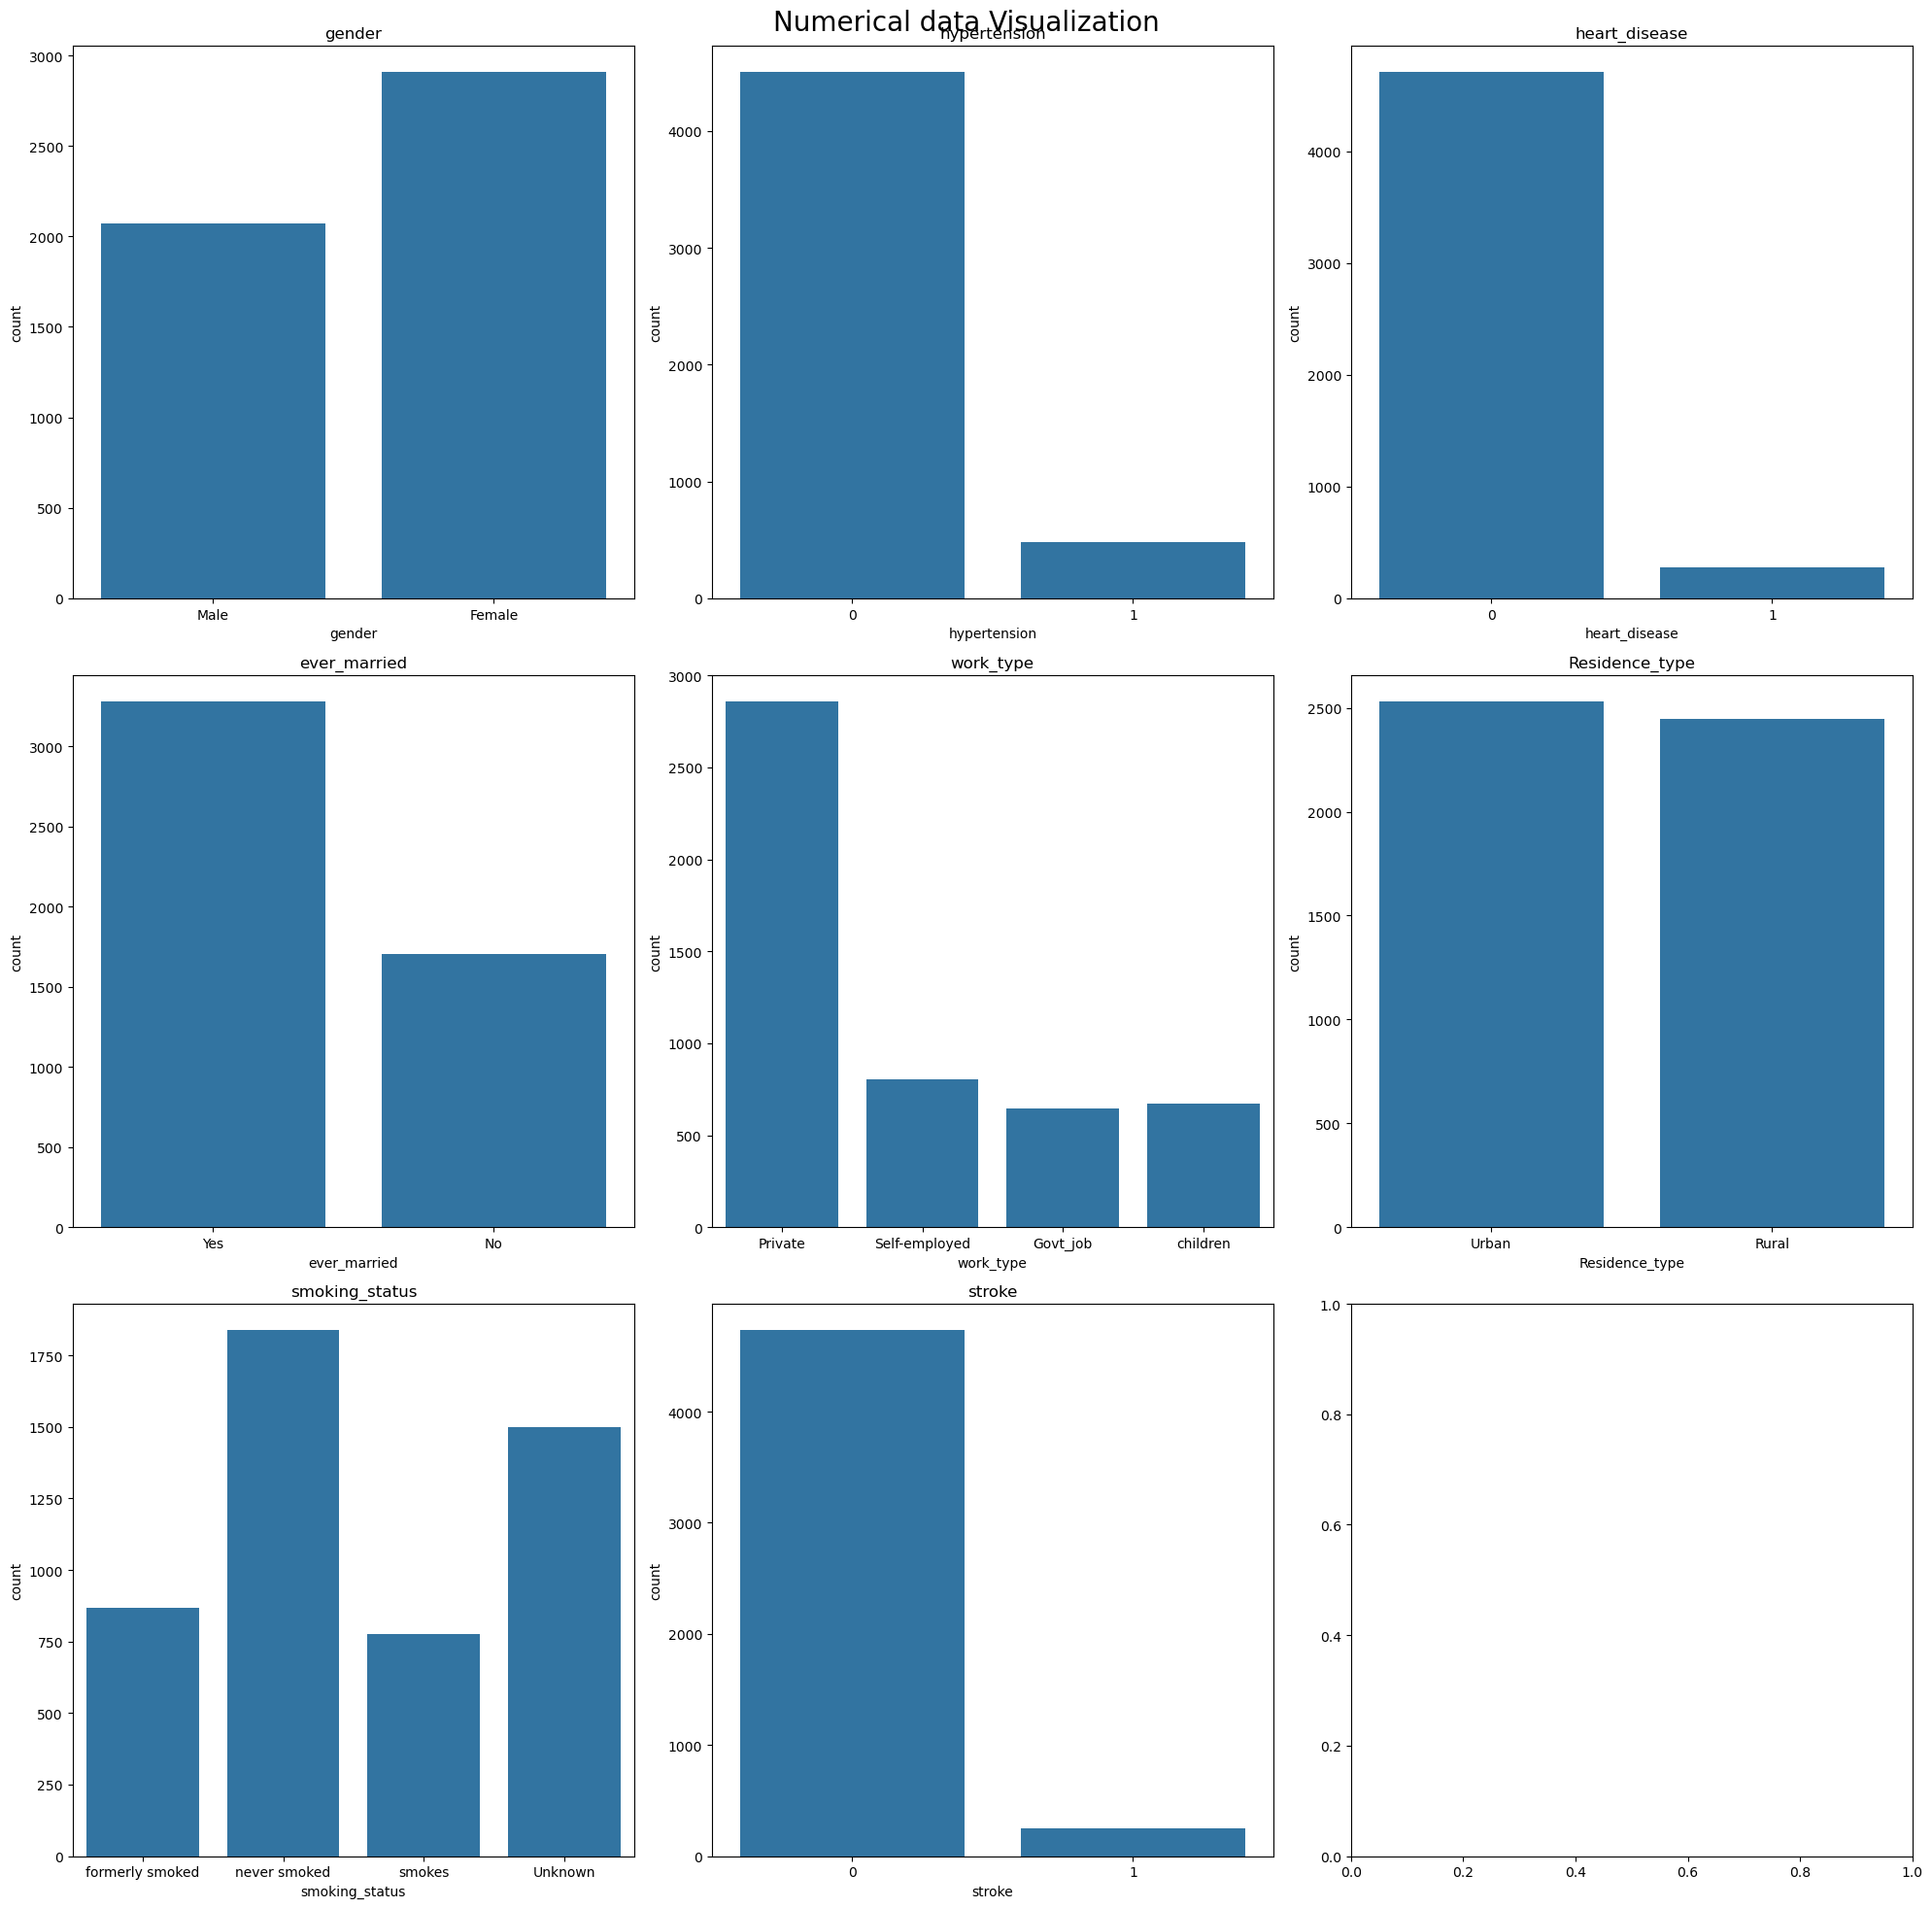

In [23]:
#Basic visualizations of columns by bar-graph
fig,ax=plt.subplots(3,3,figsize=(20,20))
fig.suptitle('Numerical data Visualization',fontsize=20)
for i,col in enumerate(categorical_data.columns):
    axs=ax[i//3,i%3]
    sns.countplot(x=df_bs[col],ax=axs)
    axs.set_title(col)
    plt.tight_layout()
plt.show()

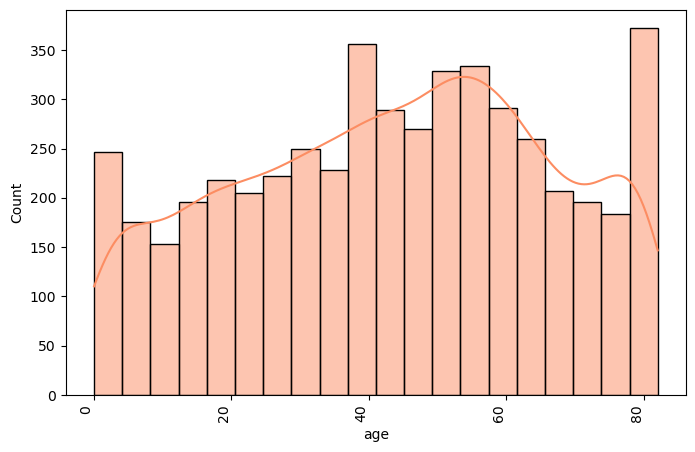

In [25]:
#Looking at the age distribution
plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df_bs['age'], kde=True, color=palette[1])
plt.xticks(rotation=90, ha="right")
plt.show()

([0, 1], [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

<Figure size 1200x800 with 0 Axes>

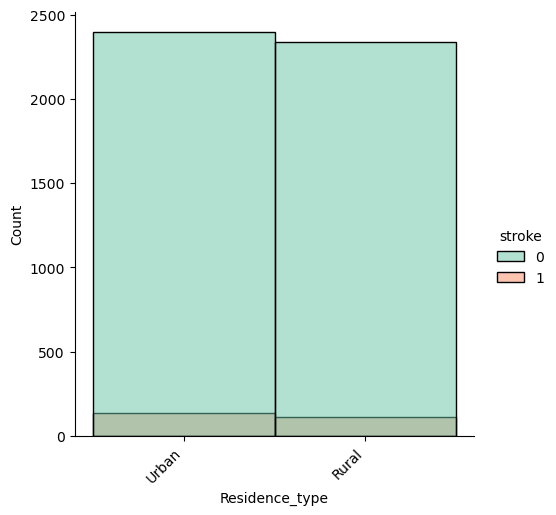

In [27]:
#Looking at residence type and stroke versus no stroke
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_bs, x="Residence_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

<Figure size 1000x500 with 0 Axes>

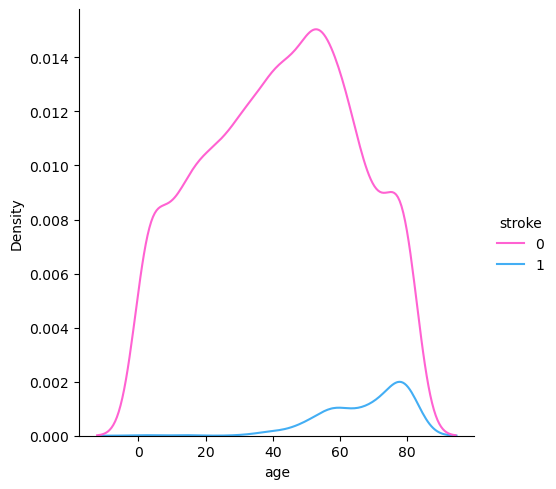

In [29]:
my_palette = ["#FF62D2", "#43AEF4"]

plt.figure(figsize=(10,5))

sns.displot(data=df_bs, x="age", hue="stroke", kind="kde",palette=my_palette)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

<Figure size 2000x1000 with 0 Axes>

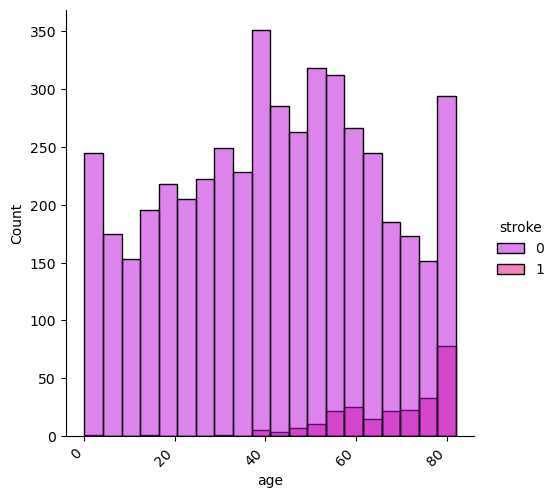

In [31]:
plt.figure(figsize=(20,10))
palette = sns.color_palette(["#BA0ADA" , "#E20C7E"])
sns.displot(data=df_bs, x="age", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

<Axes: ylabel='Density'>

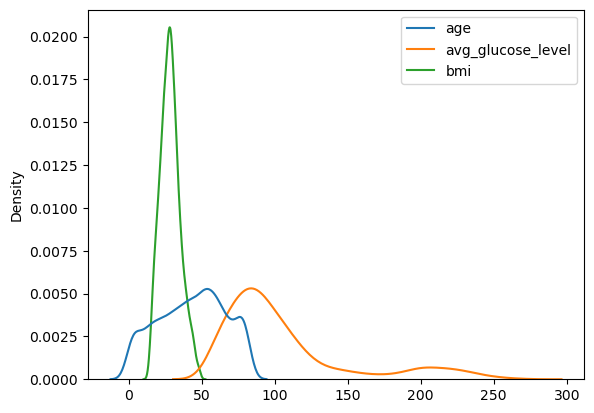

In [33]:
numerical_data = df_bs[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

<Figure size 1200x800 with 0 Axes>

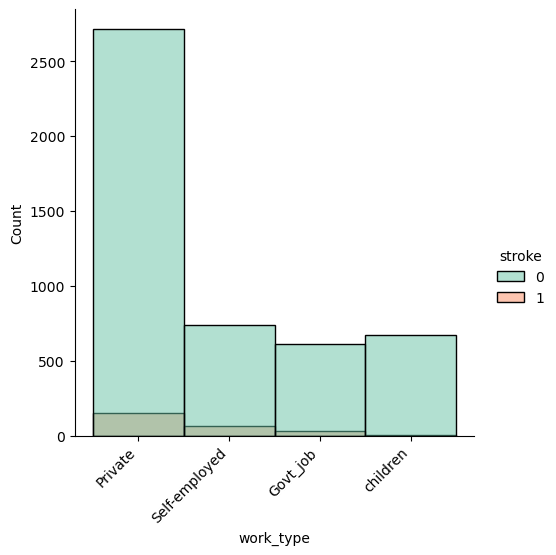

In [35]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_bs, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

In [37]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_bs.columns:
    if df_bs[col].dtype=='object':
        df_bs[col]=le.fit_transform(df_bs[col])

In [39]:
df_bs.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in df_bs.columns:
    if df_bs[col_name].nunique() > 5:
        df_bs[col_name] = scaler.fit_transform(df_bs[[col_name]])

In [43]:
X = df_bs.drop("stroke",axis=1)
y =df_bs['stroke']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with all the features: 94.7826
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



In [49]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,y_train)
y_pred=dec_clf.predict(X_test)
print('DecisionTreeClassifier accuracy score:', dec_clf.score(X_test, y_test)*100)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier accuracy score: 94.31438127090301
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1417
           1       0.29      0.06      0.11        78

    accuracy                           0.94      1495
   macro avg       0.62      0.53      0.54      1495
weighted avg       0.92      0.94      0.93      1495



In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=11)
rfc.fit(X_test, y_test)


RandomForestClassifier(n_estimators=10, random_state=11)

In [53]:
rfc_pred = rfc.predict(X_test)
rfc_pred

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test, rfc_pred) * 100
ac1

99.1304347826087

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9458375125376128
